# Predict House Price, Kaggle challenge

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from numpy import array
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def readingFile(location):
    return pd.read_csv(location) 

In [3]:
df = readingFile("../all/train.csv")
print("train ",df.shape)

#reading test data
test = readingFile("all/test.csv")
print("test " ,test.shape)

train  (1460, 81)
test  (1459, 80)


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
len(df.SalePrice.unique())

663

In [6]:
len(df.Id.unique())

1460

In [7]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### missing values

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# Numerical Data

In [10]:
dff = df._get_numeric_data()
print(dff.shape)
dff.head(5)

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
print(dff.shape)
dff.isnull().sum()

(1460, 38)


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

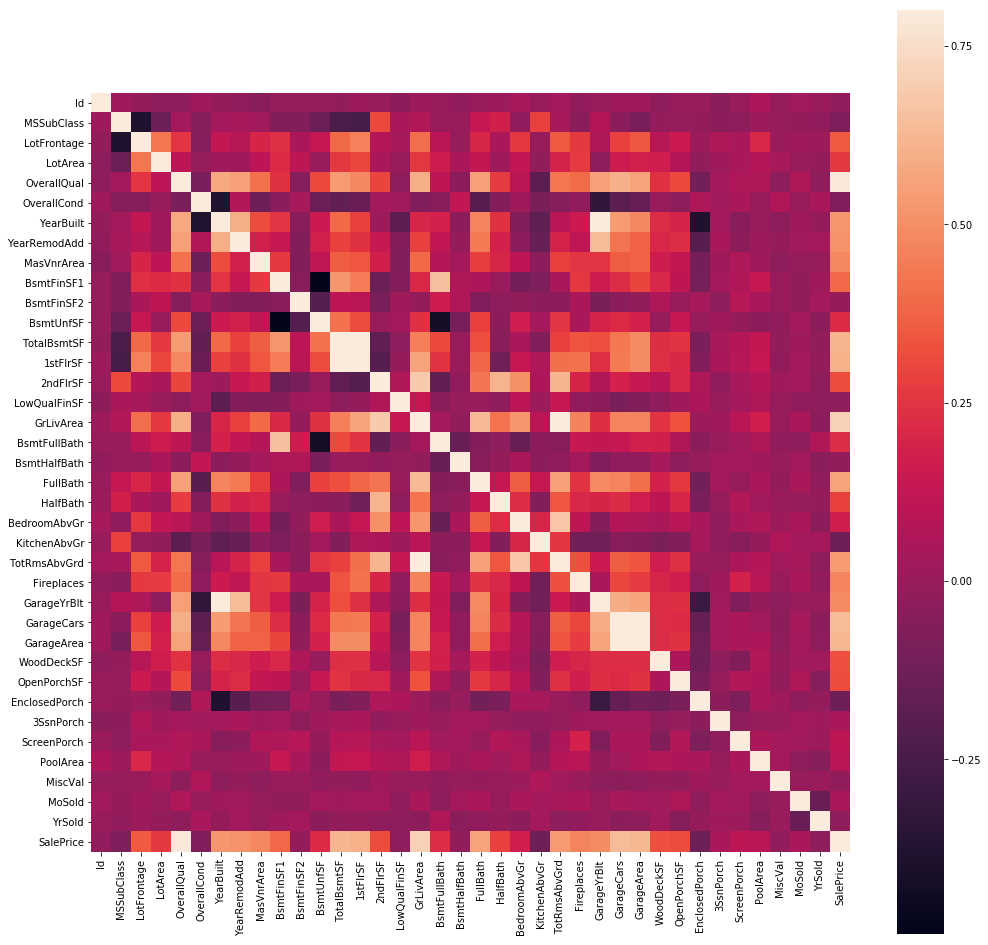

In [12]:
def correlation(trainData):
    corrmat = trainData.corr()
    f, ax = plt.subplots(figsize=(17, 17))
    sns.heatmap(corrmat, vmax=.8, square=True);
correlation(dff)

In [13]:
headers = dff.columns.tolist()
corrResult = {}
for header in headers:
    if header != 'SalePrice':
        corrResult[header] = df['SalePrice'].corr(df[header])
corrResult

{'Id': -0.02191671944343111,
 'MSSubClass': -0.08428413512659526,
 'LotFrontage': 0.3517990965706781,
 'LotArea': 0.26384335387140573,
 'OverallQual': 0.7909816005838048,
 'OverallCond': -0.077855894048678,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'MasVnrArea': 0.477493047095716,
 'BsmtFinSF1': 0.38641980624215316,
 'BsmtFinSF2': -0.011378121450215136,
 'BsmtUnfSF': 0.21447910554696895,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919147,
 '2ndFlrSF': 0.3193338028320677,
 'LowQualFinSF': -0.02560613000067959,
 'GrLivArea': 0.7086244776126522,
 'BsmtFullBath': 0.22712223313149404,
 'BsmtHalfBath': -0.01684415429735902,
 'FullBath': 0.5606637627484456,
 'HalfBath': 0.2841076755947829,
 'BedroomAbvGr': 0.16821315430073996,
 'KitchenAbvGr': -0.1359073708421411,
 'TotRmsAbvGrd': 0.5337231555820284,
 'Fireplaces': 0.46692883675152763,
 'GarageYrBlt': 0.4863616774878608,
 'GarageCars': 0.6404091972583531,
 'GarageArea': 0.6234314389183617,
 'Wood

In [14]:
df2 = pd.DataFrame(columns=['features','correlation'])

In [15]:
for k,v in corrResult.items():
    df2.append
    df2 = df2.append({'features': k,'correlation': v} , ignore_index=True)

In [16]:
df2['correlation'] = df2.correlation.abs()
df2['Class']= 'SalePrice'
df2 = df2.sort_values(by=['correlation'],ascending=False)
df2.head(20)

,features,correlation,Class
4,OverallQual,0.790982,SalePrice
16,GrLivArea,0.708624,SalePrice
26,GarageCars,0.640409,SalePrice
27,GarageArea,0.623431,SalePrice
12,TotalBsmtSF,0.613581,SalePrice
13,1stFlrSF,0.605852,SalePrice
19,FullBath,0.560664,SalePrice
23,TotRmsAbvGrd,0.533723,SalePrice
6,YearBuilt,0.522897,SalePrice
7,YearRemodAdd,0.507101,SalePrice


### categorical columns

In [17]:
df3 = df.select_dtypes(include='object')
df3.head(4)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


###### percentage of the missing values

In [18]:
ration = df3.isnull().mean()
ration

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

### outier

In [19]:
def scatterPlot(var1,var2):
    fig, ax = plt.subplots()
    ax.scatter(x = df[var1], y = df[var2])
    plt.ylabel(var2, fontsize=13)
    plt.xlabel(var1, fontsize=13)
    plt.show()

#### The bellow diagrams show that the sales price supposed to be increased as the X-axis increases. However, as they show on bottom right, the sales price is down instead of going up

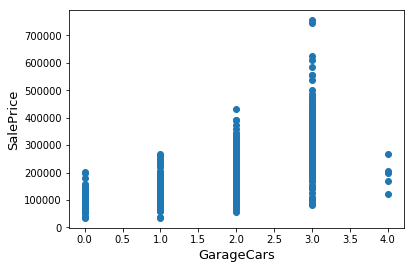

In [20]:
var1 = 'GarageCars'
var2 = 'SalePrice'
scatterPlot(var1,var2)

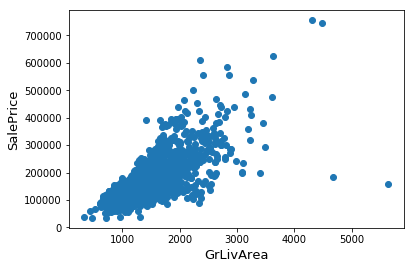

In [21]:
var1 = 'GrLivArea'
var2 = 'SalePrice'
scatterPlot(var1,var2)

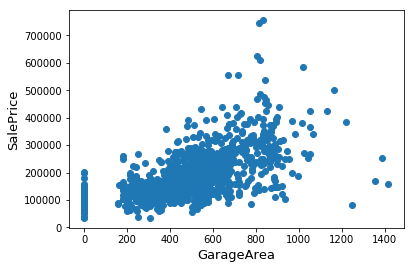

In [22]:
var1 = 'GarageArea'
var2 = 'SalePrice'
scatterPlot(var1,var2)

In [23]:
# Class analysis
# check if the data is normal or 

# Pre-processing

###### droping features/columns with missing values are not advisable but if their majority data( like 60%) was missined, droping may be an option. 

In [24]:
#all coloumns that have missing values
def columnsContainsMissingValues(df):
    return df.columns[df.isnull().any()]
missingHeader = columnsContainsMissingValues(df)
print(".........Training.............")
print(missingHeader)
#check if the test data contains missing values
allMissingTest = columnsContainsMissingValues(test)
print(".........Test..................")
allMissingTest

.........Training.............
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
.........Test..................


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [25]:
#those who have their 60% data was missied
def columnsThatContainAlotMissing(df):
    return df.columns[df.isnull().mean() > 0.6]
missing = columnsThatContainAlotMissing(df)
print(missing)
print(".............")
missingTest = columnsThatContainAlotMissing(test)
missingTest


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
.............


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [26]:
#drop the columns with 60% of data missed
def dropColumns(df,missing):
    df = df.drop(missing, axis=1)
    return df
df = dropColumns(df,missing)
print(df.shape)
print(".........")
test = dropColumns(test,missingTest)
test.shape

(1460, 77)
.........


(1459, 76)

#### change "YearBuilt" into "age" and "GarageYrBlt" to garageAge

In [27]:
def dateDifference(pastDate,currentDate):
        return (currentDate.year - pastDate.year)
def buildingAge(df):
    return df.YearBuilt.apply(lambda x:dateDifference(datetime.strptime(str(x), '%Y'),dt.datetime.now()))
def fillingGarageYrBlt(df):
    return df['GarageYrBlt'].fillna(2018, inplace =True)
def garageAge(df):
    df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x:str(x).split(".")[0])
    return df.GarageYrBlt.apply(lambda x:dateDifference(datetime.strptime(str(x), '%Y'),dt.datetime.now()))
                              
df['age'] = buildingAge(df)
fillingGarageYrBlt(df)                            
df['GarageAge'] =  garageAge(df)     

#test
test['age'] = buildingAge(test)
fillingGarageYrBlt(test)                            
test['GarageAge'] =  garageAge(test)


In [28]:
# df['age'] = df.YearBuilt.apply(lambda x:dateDifference(datetime.strptime(str(x), '%Y'),dt.datetime.now()))
# df['GarageYrBlt'].fillna(2018, inplace =True)

# df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x:str(x).split(".")[0])
# df['GarageAge'] = df.GarageYrBlt.apply(lambda x:dateDifference(datetime.strptime(str(x), '%Y'),dt.datetime.now()))

In [29]:
def dropListOfColumns(df,l):
    df = df.drop(l,axis=1)
    return df
l=['YearBuilt','GarageYrBlt']
df = dropListOfColumns(df,l)
print(df.shape)
#test
test = dropListOfColumns(test,l)
test.shape

(1460, 77)


(1459, 76)

###### sklearn only deals with numerical values. therefore, the catagorical values need to be changed to numerical.  let see how many unique values each catagorical column contains~

In [30]:
def catagoricalData(df):
    return df.select_dtypes(include='object')
# cat = df.select_dtypes(include='object')
cat = catagoricalData(df)
print(cat.shape)
#test
catTest = catagoricalData(test)
print(catTest.shape)

(1460, 39)
(1459, 39)


##### the dimension for X for training and test will be different after oneHotEncoder since the data the contain is different
##### I am goint to concat the training and test before encoding then i will split them again

##### I will add one column that differentiate the training and test. This helps to put them back to into original data

In [31]:
cat['identifier'] = 'a'
catTest['identifier'] = 'b'
print(cat.shape)
print(catTest.shape)

(1460, 40)
(1459, 40)


/Users/danielniguse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/danielniguse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
bothCat = pd.concat([cat,catTest])
bothCat.shape

(2919, 40)

##### OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers. pandas.get_dummies is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.


In [33]:
def encodingCatagorical(catagorical):
    return pd.get_dummies(catagorical)
hot = encodingCatagorical(bothCat)

print(hot.shape)
hot.head()

(2919, 241)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,identifier_a,identifier_b
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [34]:
cat = hot[hot.identifier_a.isin([1])]
cat.shape

(1460, 241)

In [35]:
catTest = hot[hot.identifier_a.isin([0])]
catTest.shape

(1459, 241)

In [36]:
ll = ['identifier_a','identifier_b']
cat = dropListOfColumns(cat,ll)
catTest = dropListOfColumns(catTest,ll)
print(cat.shape)
print(catTest.shape)

(1460, 239)
(1459, 239)


#### It is now converted into binary numerical values as you can see from the output. But, the disadvantage is that curse of dimensionality. 

##### merge the transformed data into the actual(numerical data)

In [37]:
def getIDfromNumData(df):
    return df._get_numeric_data()
df_num = getIDfromNumData(df)
#print(df_num.shape)
cat['Id']=df_num['Id']
print(cat.shape)

#test
test_num = getIDfromNumData(test)
catTest['Id']=test_num['Id']
catTest.shape

(1460, 240)


(1459, 240)

In [38]:
def mergingEncodedWithNumericalData(df1,df2):
    return pd.merge(df1,df2,how='left',on='Id')

merged = mergingEncodedWithNumericalData(df_num,cat)
print(merged.shape)
#test
mergedTest = mergingEncodedWithNumericalData(test_num,catTest)
print(mergedTest.shape)
mergedTest.head(3)


(1460, 277)
(1459, 276)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0


#### imputing missing values

In [39]:
miss = merged.columns[merged.isnull().any()]
print(miss)
print( )
#test
missTest = mergedTest.columns[mergedTest.isnull().any()]
missTest

Index(['LotFrontage', 'MasVnrArea'], dtype='object')



Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [40]:
def imputer(df,listOfColumns):
    imp = Imputer(missing_values='NaN',strategy='median',axis=0) 
    return imp.fit(df[listOfColumns])
imputerdf = imputer(merged,miss)
imputerTest = imputer(mergedTest,missTest)

In [41]:
def transformAfterImputer(imputerdf, df,listOfColumns):
    transformeddf = imputerdf.transform(df[listOfColumns])
    df[listOfColumns] = transformeddf 
    return df
merged = transformAfterImputer(imputerdf,merged,miss)  
mergedTest = transformAfterImputer(imputerTest,mergedTest,missTest)

print(merged.shape)
print(mergedTest.shape)
# transformeddf = imputerdf.transform(merged[miss])
# merged[miss] = transformeddf 

(1460, 277)
(1459, 276)


In [42]:
print(merged.columns[merged.isnull().any()])
print("..........")
print(mergedTest.columns[mergedTest.isnull().any()])

Index([], dtype='object')
..........
Index([], dtype='object')


In [43]:
print("Training " ,merged.shape)
print(" ")
print("Test " ,mergedTest.shape)

Training  (1460, 277)
 
Test  (1459, 276)


#### the distriution of class, as the plot shows,is right skewed. this affect the perfomance of the model as models assume that the data is normal.

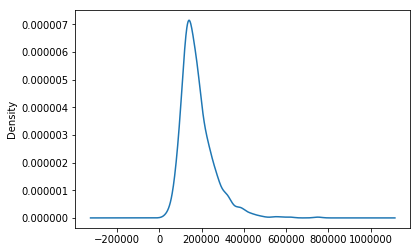

In [44]:
skewed = merged.SalePrice.plot.kde()

#### apply the log function to transform the data in order to make it normal. later, the prediction result will be reversed  

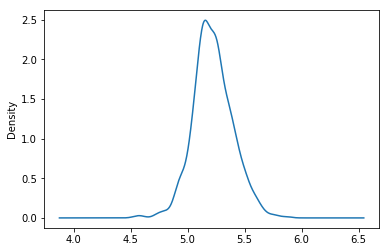

In [45]:
log_transformed = (merged.SalePrice+1).apply(np.log10)   # Get the log of the data
log_transformed.plot.kde()

In [46]:
merged['logSalePrice'] = log_transformed

In [47]:
merged['logSalePrice'].head(3)

0    5.319108
1    5.258879
2    5.349279
Name: logSalePrice, dtype: float64

In [48]:
merged.shape

(1460, 278)

# Model

In [60]:
clf = SVR(kernel='rbf', gamma=0.1)

In [61]:
C = [1,10,100]
gamma = [0.001,0.0001]

In [62]:
parameter =[{'C' : C, 'gamma':gamma}]

In [63]:
# svmGrid = GridSearchCV(estimator= clf,param_grid=para, n_jobs=-1)
svmGrid = GridSearchCV(estimator= clf,param_grid=parameter)
svmGrid

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
# svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
#                    param_grid={"C": [1e0, 1e1, 1e2, 1e3],
#                                "gamma": np.logspace(-2, 2, 5)})

In [49]:
y = merged['logSalePrice']

In [50]:
X = merged.drop(['SalePrice','logSalePrice'], axis=1)

In [51]:
model = LinearRegression().fit(X, y)

In [64]:
# fit
svmGrid.fit(X, y) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
# models = {'Reg':LinearRegression(),'SVR': SVR()}

{'Reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'SVR': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}

In [52]:
#predict
predict = model.predict(mergedTest)
# predict = svmGrid.predict(mergedTest)

In [53]:
result = mergedTest[['Id']]
result.shape

(1459, 1)

In [54]:
result['predicted'] = predict

/Users/danielniguse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
base = 10
result['SalePrice'] = result['predicted'].apply(lambda x:np.power(base,x))
# 
# np.power(base,5.168792020314182)

/Users/danielniguse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
result.head()

,Id,predicted,SalePrice
0,1461,5.083564,121217.138440
1,1462,5.190251,154971.039695
2,1463,5.266622,184766.058888
3,1464,5.306228,202408.022267
4,1465,5.287011,193647.309675


In [57]:
result = result.drop(['predicted'],axis=1)
result.head()

,Id,SalePrice
0,1461,121217.138440
1,1462,154971.039695
2,1463,184766.058888
3,1464,202408.022267
4,1465,193647.309675


In [71]:
result.to_csv('resultSVRCV.csv')